# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()
       

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            
            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date,
                              "Pressure": city_pressure})
    
        else:
            print(f"The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | fort st. john
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | egilsstadir
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | jiangyou
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | kourou
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | dellys
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | brookings
Processing Record 21 of Set 1 | okahandja
Processing Record 22 of Set 1 | umba
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
Pressure      586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Pressure
0,Puerto Ayora,-0.7393,-90.3518,72.46,80,73,10.42,EC,1733169497,1011
1,Fort St. John,56.2499,-120.8529,17.49,93,75,4.61,CA,1733169582,1009
2,Tiksi,71.6872,128.8694,-9.71,100,50,5.46,RU,1733169434,1022
3,Stanley,54.8680,-1.6985,36.18,86,20,6.91,GB,1733169436,1019
4,Egilsstadir,65.2653,-14.3948,13.91,67,0,6.91,IS,1733169586,1019


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Pressure
City_ID,,,,,,,,,,
0,Puerto Ayora,-0.7393,-90.3518,72.46,80,73,10.42,EC,1733169497,1011
1,Fort St. John,56.2499,-120.8529,17.49,93,75,4.61,CA,1733169582,1009
2,Tiksi,71.6872,128.8694,-9.71,100,50,5.46,RU,1733169434,1022
3,Stanley,54.8680,-1.6985,36.18,86,20,6.91,GB,1733169436,1019
4,Egilsstadir,65.2653,-14.3948,13.91,67,0,6.91,IS,1733169586,1019


In [8]:
 # Date Cleaning w/dates
df["Date"] = pd.to_datetime(df.Date * 1e9)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Pressure
City_ID,,,,,,,,,,
0,Puerto Ayora,-0.7393,-90.3518,72.46,80,73,10.42,EC,2024-12-02 19:58:17,1011
1,Fort St. John,56.2499,-120.8529,17.49,93,75,4.61,CA,2024-12-02 19:59:42,1009
2,Tiksi,71.6872,128.8694,-9.71,100,50,5.46,RU,2024-12-02 19:57:14,1022
3,Stanley,54.8680,-1.6985,36.18,86,20,6.91,GB,2024-12-02 19:57:16,1019
4,Egilsstadir,65.2653,-14.3948,13.91,67,0,6.91,IS,2024-12-02 19:59:46,1019


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

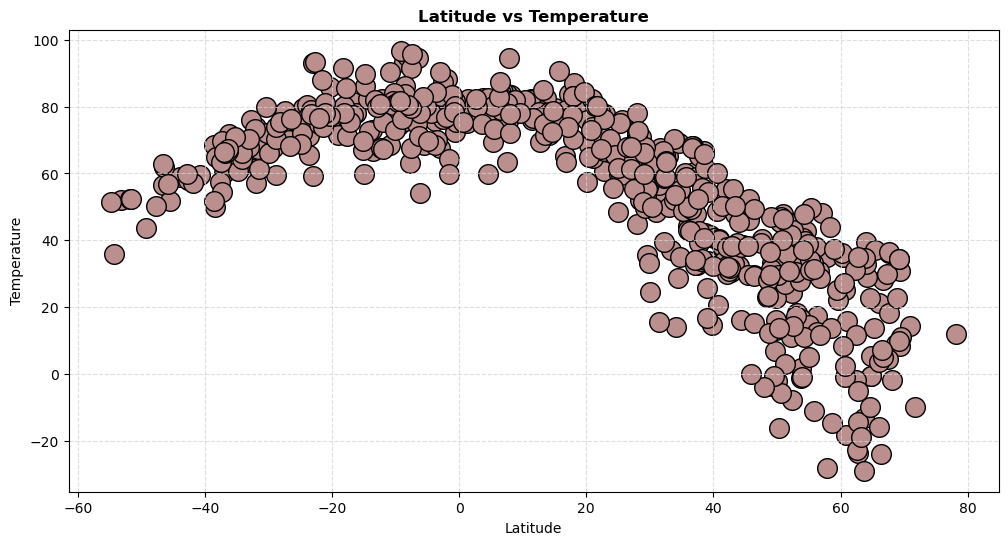

In [9]:
# Build scatter plot for latitude vs. temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Max Temp"], color="rosybrown", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature", fontweight="bold")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show() 

#### Latitude Vs. Humidity

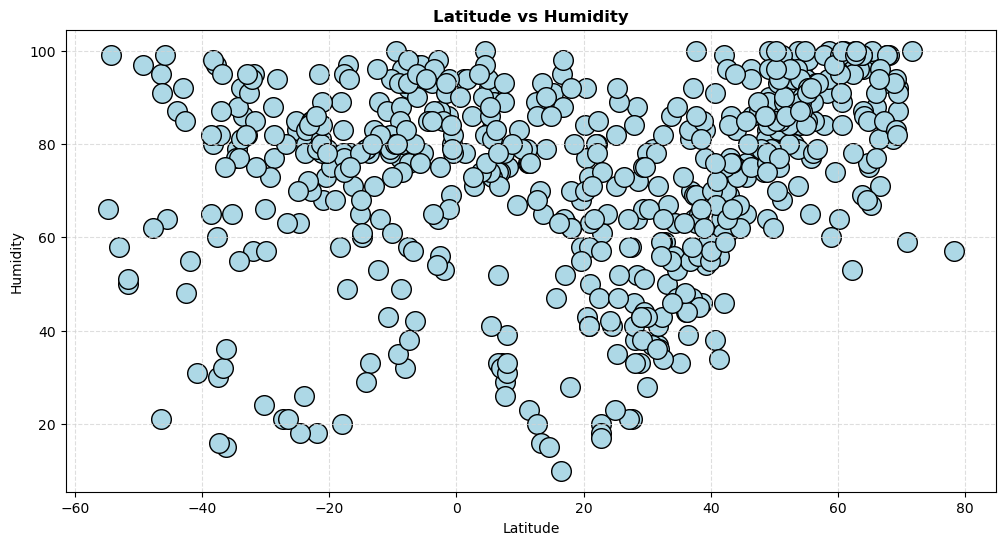

In [10]:
# Build the scatter plots for latitude vs. humidity

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Humidity"], color="lightblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontweight="bold")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

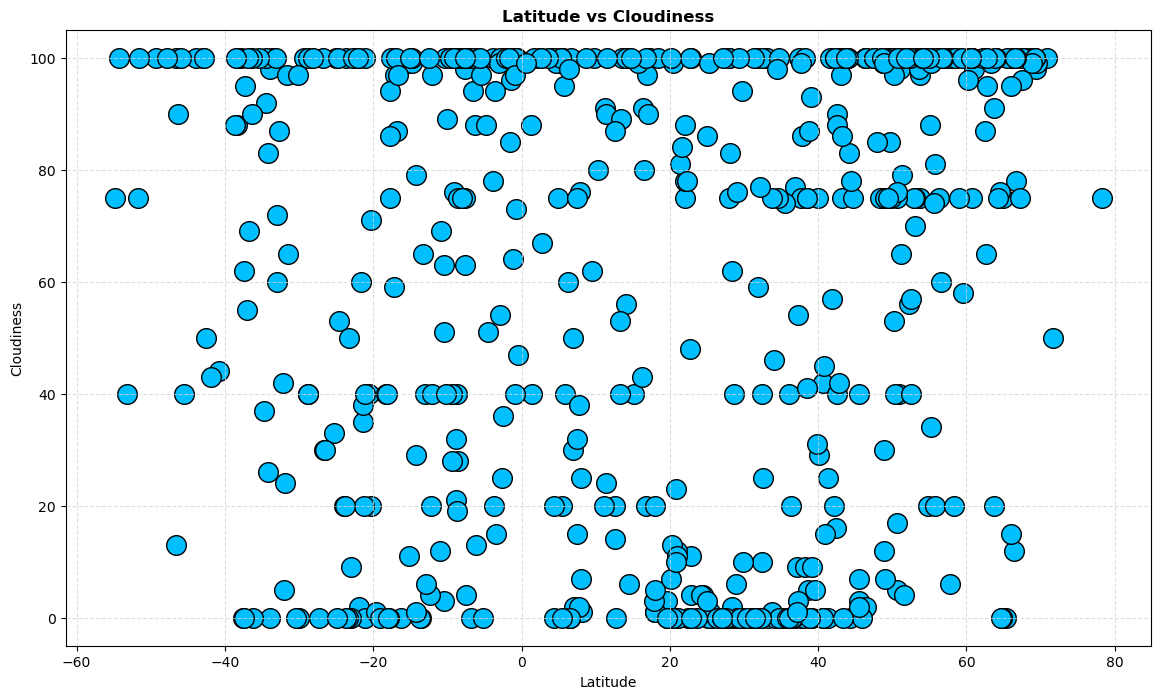

In [11]:
# Build the scatter plots for latitude vs. cloudiness

# Change Canvas Size
plt.figure(figsize=(14, 8))

# Create a basic plot
plt.scatter(df.Lat, df["Cloudiness"], color="deepskyblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

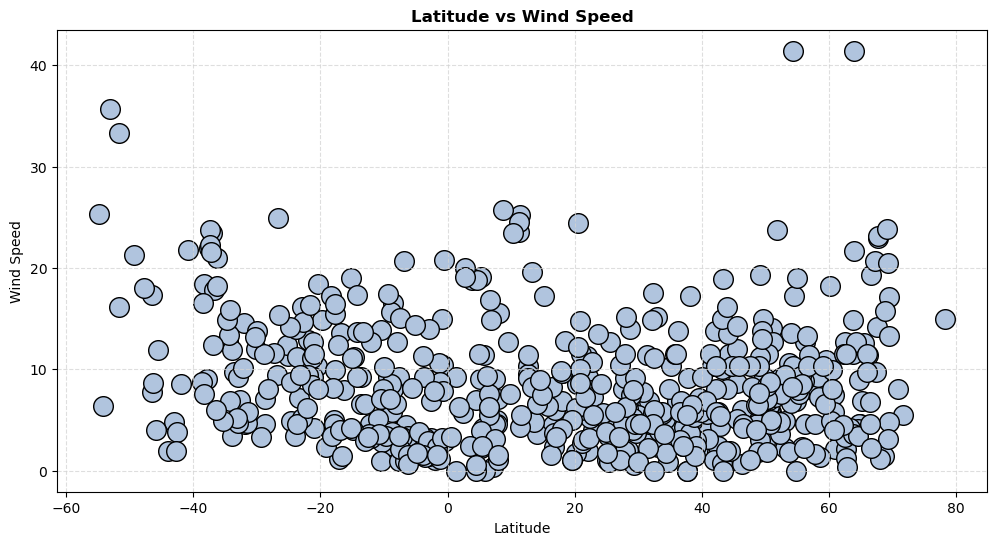

In [12]:
# Build the scatter plots for latitude vs. wind speed

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(df.Lat, df["Wind Speed"], color="lightsteelblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontweight="bold")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="mediumvioletred", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Pressure
0,Fort St. John,56.2499,-120.8529,17.49,93,75,4.61,CA,2024-12-02 19:59:42,1009
1,Tiksi,71.6872,128.8694,-9.71,100,50,5.46,RU,2024-12-02 19:57:14,1022
2,Stanley,54.8680,-1.6985,36.18,86,20,6.91,GB,2024-12-02 19:57:16,1019
3,Egilsstadir,65.2653,-14.3948,13.91,67,0,6.91,IS,2024-12-02 19:59:46,1019
4,Isafjordur,66.0755,-23.1240,21.27,88,100,11.43,IS,2024-12-02 19:58:58,1009


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Pressure
0,Puerto Ayora,-0.7393,-90.3518,72.46,80,73,10.42,EC,2024-12-02 19:58:17,1011
1,Rio Grande,-32.0350,-52.0986,73.94,57,5,14.61,BR,2024-12-02 19:58:20,1006
2,Port-aux-Français,-49.3500,70.2167,43.65,97,100,21.32,TF,2024-12-02 19:57:52,1008
3,Adamstown,-25.0660,-130.1015,73.42,83,100,11.30,PN,2024-12-02 19:57:01,1022
4,Blackmans Bay,-43.0167,147.3167,58.53,92,100,4.81,AU,2024-12-02 19:57:36,1000


###  Temperature vs. Latitude Linear Regression Plot

-0.8504332150883882
y = -1.23x + 91.78


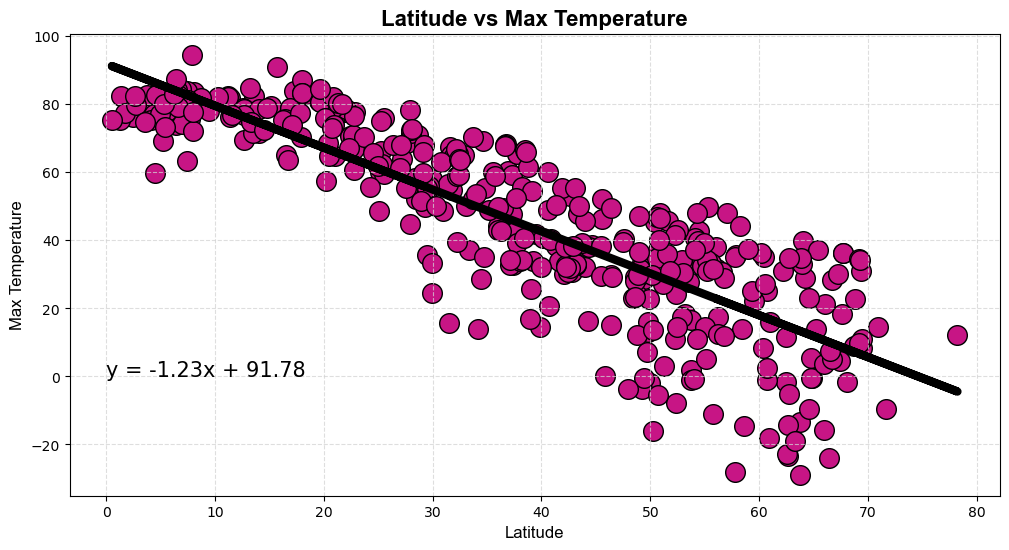

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.6788741618009967
y = 0.52x + 83.66


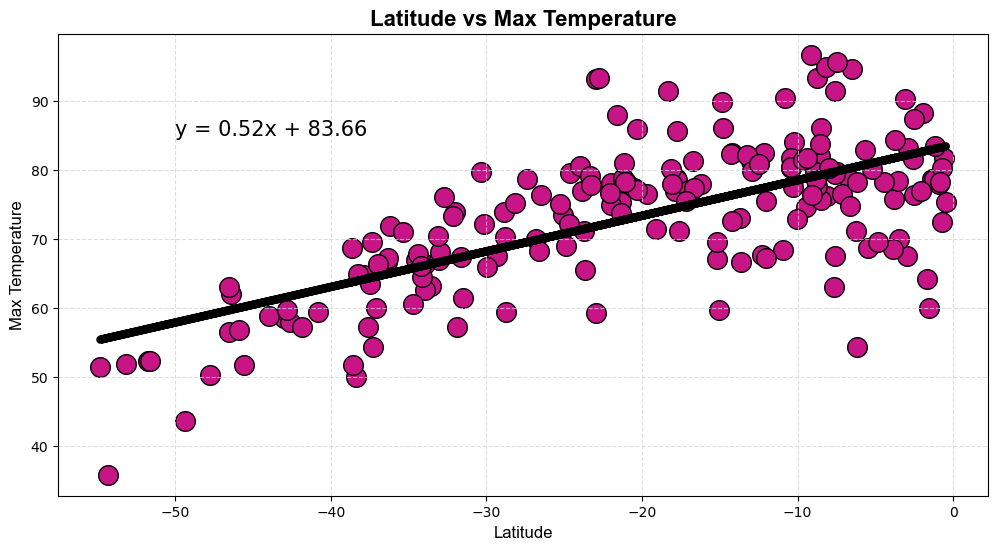

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-50, 85)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** The temperature has a correlation with the latitude, the closer to the equator, the hotter it is and the further away from the equator the colder it is. 

### Humidity vs. Latitude Linear Regression Plot

0.39843220284018976
y = 0.43x + 56.75


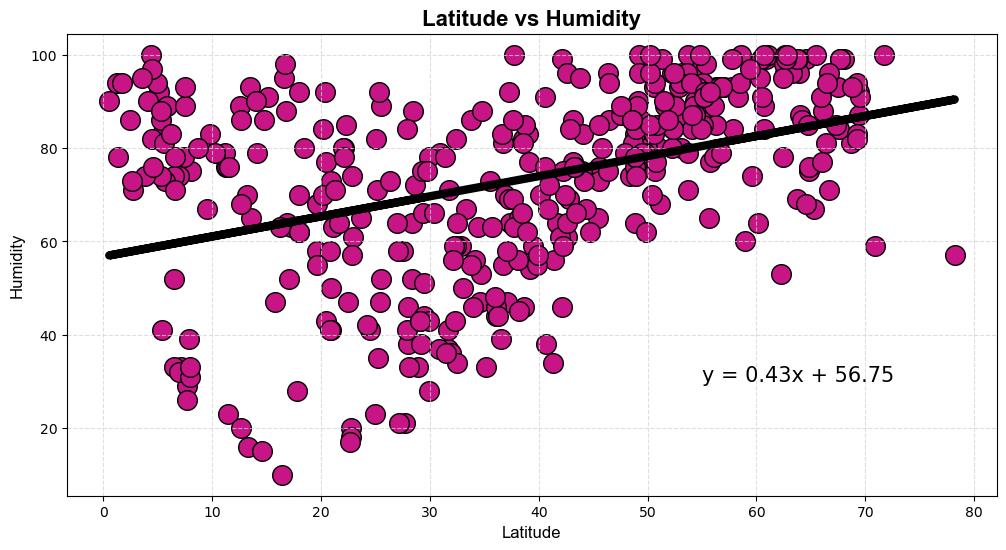

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

0.15268734595640424
y = 0.22x + 78.03


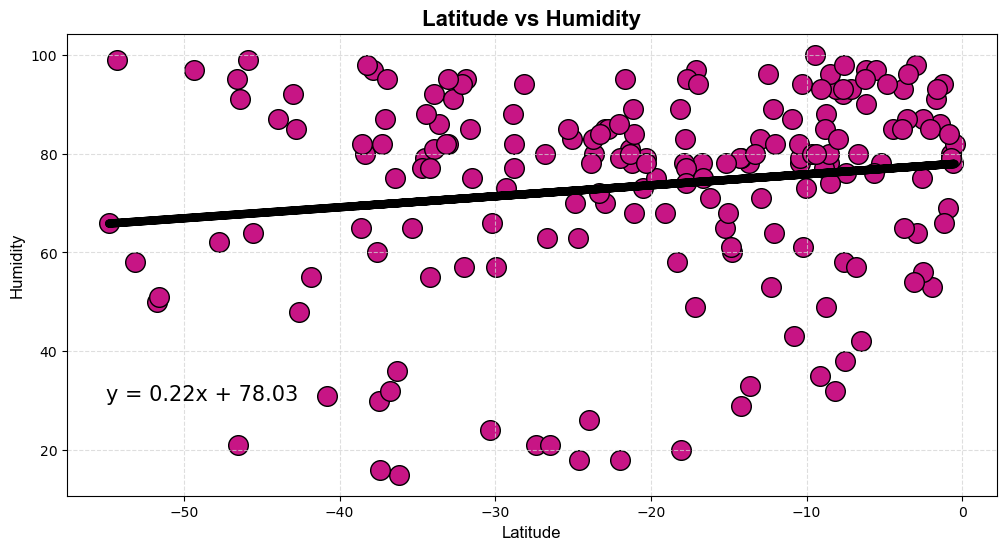

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There does not seem to be a very strong relationship with the humidity and the wether it's close or far from the equator

### Cloudiness vs. Latitude Linear Regression Plot

0.2836034749328026
y = 0.62x + 35.8


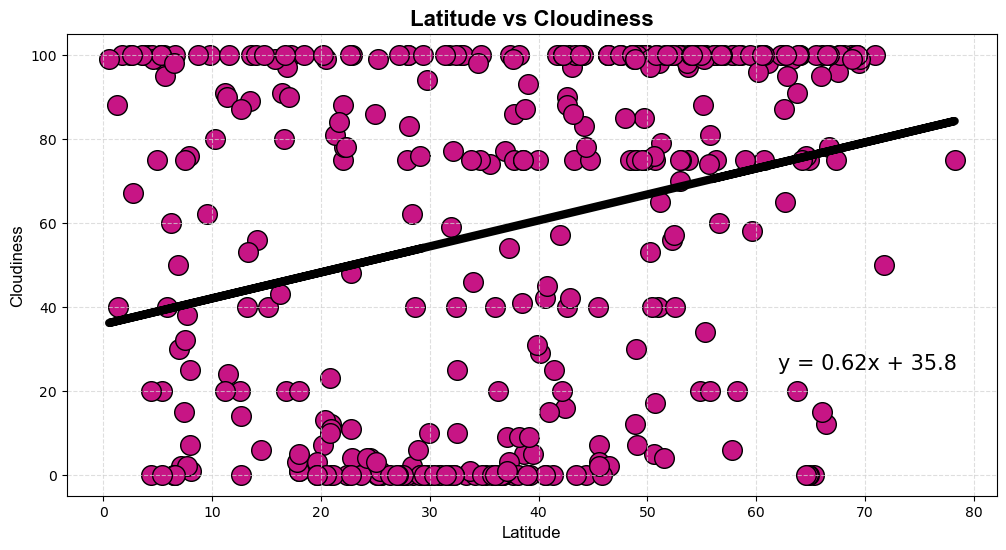

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (62, 25)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.02013849768490931
y = -0.05x + 60.86


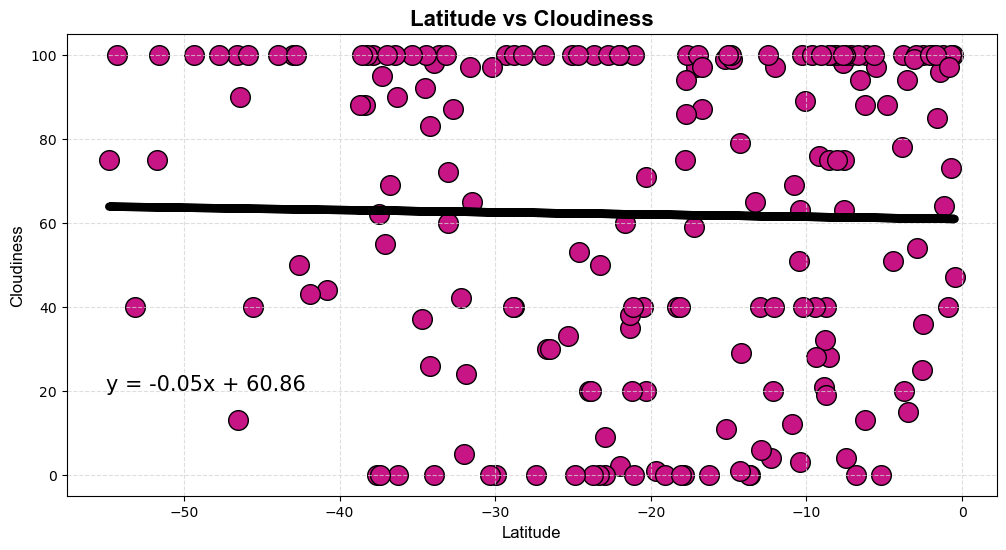

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-55, 20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Cloudiness also has a weak relationship with the latitude and longitude



### Wind Speed vs. Latitude Linear Regression Plot

0.09350800593350096
y = 0.03x + 6.75


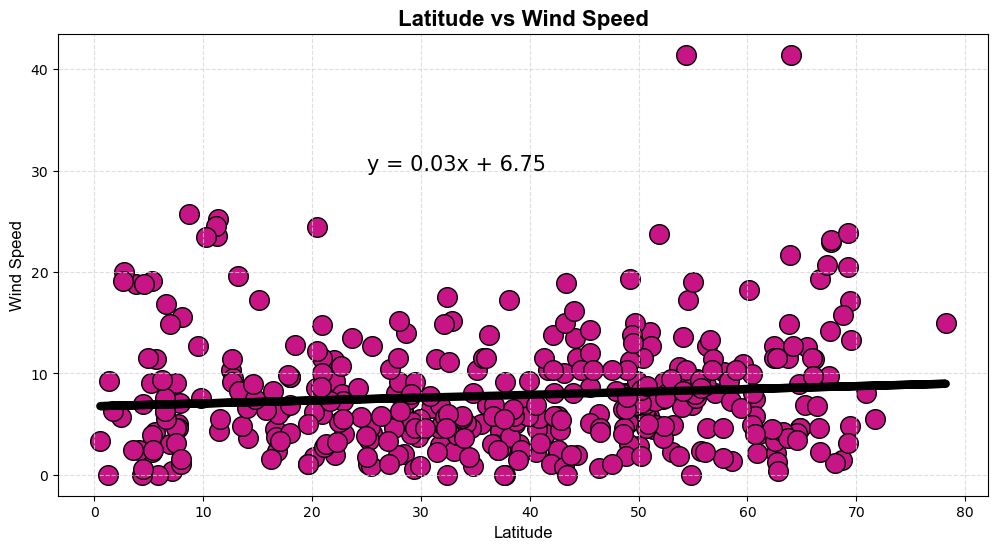

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (25, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.436290836637468
y = -0.2x + 5.29


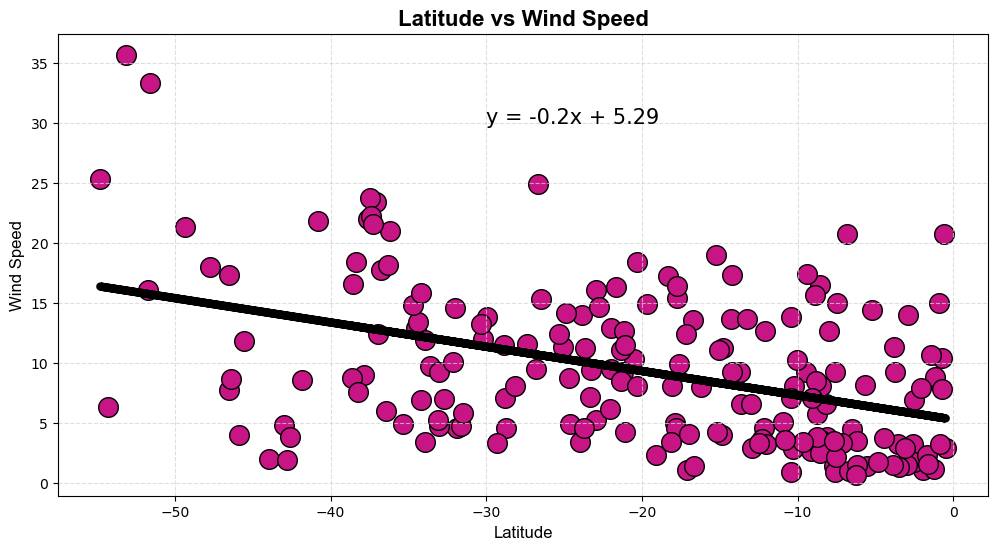

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-30,30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Wind Speed also has a weak relationship with the equator, but does tend to stay below 20 mph, regardless of the location.